In [1]:
import json
import os
import re
from typing import Dict


def load_execution_results(results_dir: str) -> Dict:
    """Load and aggregate execution results from multiple files."""
    pattern = re.compile(r'.*Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_\d{16}_timeout-8_exec_results_v4\.jsonl$')
    results = {}
    
    for dir in os.listdir(results_dir):
        dir_path = os.path.join(results_dir, dir)
        if os.path.isdir(dir_path) and "train" in dir:
            for filename in os.listdir(dir_path):
                if pattern.match(filename) and "temp_0.8" in filename:
                    print(f"Loading {filename}")
                    with open(os.path.join(dir_path, filename), 'r') as f:
                        for line in f:
                            d = json.loads(line)
                            uid = d["uid"]
                            if uid not in results:
                                results[uid] = d
                            else:
                                # Merge lists from multiple results
                                result = results[uid]
                                for (k1, v1), (k2, v2) in zip(result.items(), d.items()):
                                    if k1 == k2 and isinstance(v1, list) and isinstance(v2, list):
                                        result[k1] = v1 + v2
                                results[uid] = result
    return results

In [2]:
results = load_execution_results("../results")
results.keys()

Loading arc_problems_train_240_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1111110600563620_timeout-8_exec_results_v4.jsonl
Loading arc_problems_train_240_3631a71a_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1111171530373334_timeout-8_exec_results_v4.jsonl
Loading arc_problems_train_160_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1111110349182985_timeout-8_exec_results_v4.jsonl


dict_keys(['d0f5fe59', '3c9b0459', 'd13f3404', '9172f3a0', 'ae4f1146', '8be77c9e', '5c0a986e', '56ff96f3', '22eb0ac0', '855e0971', '94f9d214', '4c4377d9', '868de0fa', 'a2fd1cf0', 'c3e719e8', '32597951', '72322fa7', '5582e5ca', '539a4f51', '1c786137', 'd631b094', '9565186b', 'a61ba2ce', 'c444b776', '7fe24cdd', '50cb2852', '9dfd6313', 'e9afcf9a', '3af2c5a8', 'ef135b50', '321b1fc6', '54d9e175', 'd07ae81c', 'f76d97a5', 'a5313dff', '6773b310', '88a10436', 'e76a88a6', '928ad970', '6d0160f0', 'a416b8f3', '6e02f1e3', 'ddf7fa4f', 'a740d043', '75b8110e', '93b581b8', 'dc1df850', '5117e062', '23b5c85d', '3906de3d', '85c4e7cd', '8efcae92', 'b6afb2da', 'd406998b', 'f25ffba3', '29ec7d0e', 'b548a754', '5ad4f10b', 'ed36ccf7', '6d0aefbc', '760b3cac', '40853293', '7b7f7511', 'ce4f8723', '74dd1130', '27a28665', '234bbc79', '272f95fa', 'b9b7f026', 'd43fd935', '4522001f', 'e40b9e2f', '68b16354', 'c8f0f002', '39e1d7f9', 'dbc1a6ce', '83302e8f', 'a85d4709', 'a64e4611', '673ef223', '67385a82', '67e8384a', 'b230

/tmp/ipykernel_3332652/322378966.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([success_counts[level] for level in difficulty_levels], labels=difficulty_levels)


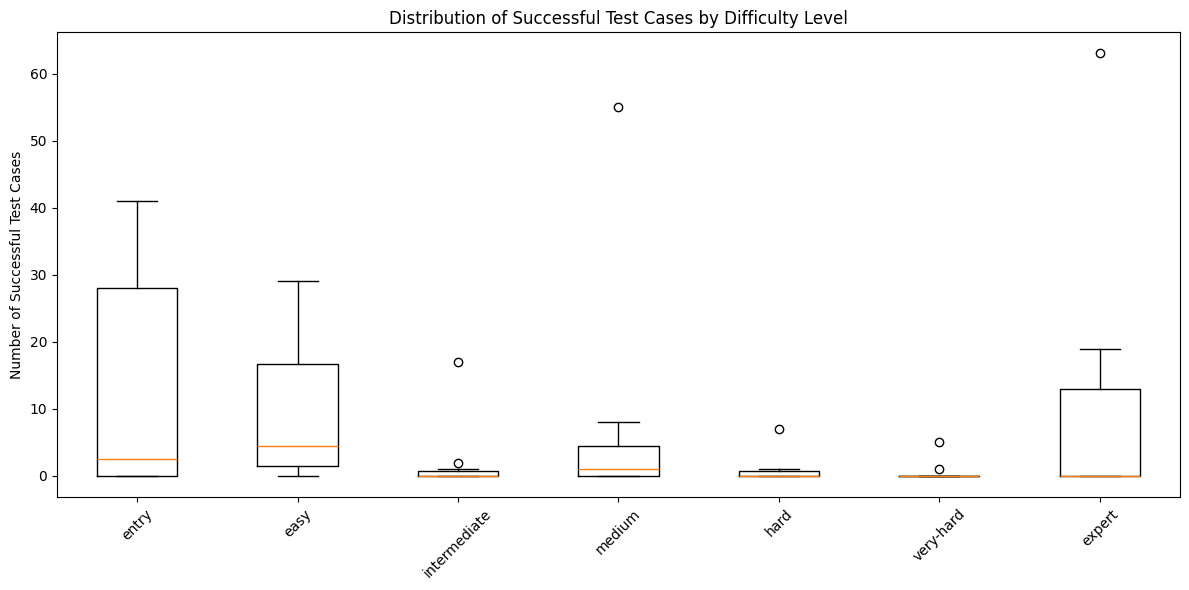

entry: 13.20 average successes
easy: 9.60 average successes
intermediate: 2.00 average successes
medium: 7.30 average successes
hard: 0.90 average successes
very-hard: 0.60 average successes
expert: 10.00 average successes


In [4]:
sampled_level_keys = {'entry': {'training': ['a699fb00', 'bb43febb', 'b1948b0a', '54d82841', '4258a5f9', '6f8cd79b', 'a65b410d', 'aabf363d', '60b61512', 'a79310a0'], 'validation': ['4f537728', '5207a7b5', '66e6c45b', 'fc754716', '292dd178', 'e7639916', 'e7dd8335']}, 'easy': {'training': ['7e0986d6', '913fb3ed', 'ea32f347', 'dc433765', '74dd1130', 'af902bf9', '25d8a9c8', '2bcee788', 'b8cdaf2b', '543a7ed5'], 'validation': ['8fbca751', '84f2aca1', '4e469f39', '17cae0c1', '782b5218', '351d6448', 'ef26cbf6', '759f3fd3', '705a3229', 'd37a1ef5']}, 'intermediate': {'training': ['e509e548', 'e48d4e1a', '0e206a2e', '868de0fa', '4290ef0e', '890034e9', 'f5b8619d', 'd90796e8', '88a10436', '5bd6f4ac'], 'validation': ['68b67ca3', '3a301edc', '67b4a34d', '2b01abd0', '81c0276b', '97239e3d', 'cfb2ce5a', 'aa18de87', 'ce8d95cc', '13713586']}, 'medium': {'training': ['1b60fb0c', 'eb5a1d5d', 'f25fbde4', '82819916', '681b3aeb', '746b3537', 'e50d258f', '8e1813be', 'be94b721', '1f85a75f'], 'validation': ['c35c1b4c', '2072aba6', '0bb8deee', 'c658a4bd', '54db823b', '9a4bb226', 'e9b4f6fc', '15663ba9', 'fb791726', '90347967']}, 'hard': {'training': ['007bbfb7', 'cf98881b', 'd2abd087', 'f8b3ba0a', 'ae4f1146', '44d8ac46', 'cdecee7f', 'a87f7484', '539a4f51', 'a61ba2ce'], 'validation': ['a8610ef7', '4cd1b7b2', '7d419a02', '59341089', '7c8af763', '184a9768', '0a1d4ef5', 'e7b06bea', 'e74e1818', 'f9a67cb5']}, 'very-hard': {'training': ['1fad071e', 'db93a21d', '234bbc79', '4938f0c2', '39e1d7f9', '6430c8c4', '8eb1be9a', '53b68214', '6773b310', 'ce4f8723'], 'validation': ['34b99a2b', '4852f2fa', 'bf89d739', '2697da3f', '070dd51e', '31adaf00', 'fd096ab6', '14754a24', 'e95e3d8e', '6ad5bdfd']}, 'expert': {'training': ['b775ac94', '5c2c9af4', 'd22278a0', 'a78176bb', '6a1e5592', '1caeab9d', '9aec4887', 'b190f7f5', '484b58aa', 'f8a8fe49'], 'validation': ['22a4bbc2', 'b20f7c8b', '16b78196', 'b0f4d537', 'c92b942c', 'dd2401ed', '136b0064', '505fff84', '5a5a2103', '891232d6']}}

# Create lists to store success counts for each difficulty level
success_counts = {level: [] for level in sampled_level_keys.keys()}

for level, v in sampled_level_keys.items():
    train_uids = v["training"]
    for uid in train_uids:
        result = results[uid]
        num_successes = sum(result["train_test_verdicts"])
        success_counts[level].append(num_successes)

# Create histogram using matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
difficulty_levels = ['entry', 'easy', 'intermediate', 'medium', 'hard', 'very-hard', 'expert']
plt.boxplot([success_counts[level] for level in difficulty_levels], labels=difficulty_levels)
plt.title('Distribution of Successful Test Cases by Difficulty Level')
plt.ylabel('Number of Successful Test Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Print mean successes for each level
for level in difficulty_levels:
    mean_successes = sum(success_counts[level]) / len(success_counts[level])
    print(f"{level}: {mean_successes:.2f} average successes")

In [3]:
sum([False, True, True, False])

2

In [7]:
# secondary source: https://github.com/neoneye/ARC-Interactive/blob/main/webroot/meta-levels.js
# Based on by ARC-Game by Alexey Borsky (volotat)
# https://github.com/volotat/ARC-Game
META_ARC_LEVELS = {
    "entry": {
        "training": [
            "bb43febb",
            "aabf363d",
            "a65b410d",
            "a699fb00",
            "54d82841",
            "d037b0a7",
            "6d75e8bb",
            "25ff71a9",
            "60b61512",
            "a79310a0",
            "ea786f4a",
            "b1948b0a",
            "6f8cd79b",
            "ed36ccf7",
            "3bdb4ada",
            "3aa6fb7a",
            "4258a5f9"
        ],
        "validation": [
            "4f537728",
            "5207a7b5",
            "66e6c45b",
            "fc754716",
            "292dd178",
            "e7639916",
            "e7dd8335"
        ]
    },
    "easy": {
        "training": [
            "760b3cac",
            "08ed6ac7",
            "d511f180",
            "dc433765",
            "ea32f347",
            "67a3c6ac",
            "c8f0f002",
            "22eb0ac0",
            "e26a3af2",
            "41e4d17e",
            "a3df8b1e",
            "74dd1130",
            "beb8660c",
            "98cf29f8",
            "ba26e723",
            "28e73c20",
            "56ff96f3",
            "d364b489",
            "ef135b50",
            "5c0a986e",
            "e21d9049",
            "97999447",
            "3ac3eb23",
            "50cb2852",
            "67a423a3",
            "0962bcdd",
            "32597951",
            "af902bf9",
            "b60334d2",
            "25d8a9c8",
            "ba97ae07",
            "29c11459",
            "6e19193c",
            "623ea044",
            "f25ffba3",
            "23581191",
            "3c9b0459",
            "bd4472b8",
            "95990924",
            "29623171",
            "d406998b",
            "0d3d703e",
            "6150a2bd",
            "aba27056",
            "e8593010",
            "7b6016b9",
            "b6afb2da",
            "e5062a87",
            "ec883f72",
            "dc1df850",
            "d6ad076f",
            "9dfd6313",
            "4093f84a",
            "228f6490",
            "913fb3ed",
            "3618c87e",
            "d89b689b",
            "7ddcd7ec",
            "d4f3cd78",
            "8403a5d5",
            "a5f85a15",
            "05f2a901",
            "6e02f1e3",
            "b27ca6d3",
            "2bcee788",
            "b548a754",
            "bdad9b1f",
            "f8c80d96",
            "178fcbfb",
            "4347f46a",
            "8e5a5113",
            "543a7ed5",
            "3bd67248",
            "7f4411dc",
            "63613498",
            "7e0986d6",
            "928ad970",
            "b8cdaf2b",
            "ddf7fa4f",
            "c9f8e694",
            "694f12f3",
            "3345333e",
            "a85d4709",
            "2281f1f4",
            "7447852a",
            "99fa7670",
            "952a094c",
            "1bfc4729",
            "e179c5f4",
            "56dc2b01",
            "1e0a9b12",
            "b7249182",
            "5168d44c",
            "22168020",
            "db3e9e38",
            "d5d6de2d",
            "a1570a43",
            "d8c310e9",
            "8d510a79",
            "aedd82e4",
            "11852cab",
            "e9afcf9a",
            "941d9a10",
            "496994bd",
            "00d62c1b",
            "a48eeaf7",
            "0ca9ddb6",
            "25d487eb",
            "810b9b61",
            "f76d97a5",
            "67385a82",
            "1f876c06",
            "5582e5ca",
            "272f95fa",
            "c3f564a4",
            "6c434453",
            "e76a88a6",
            "9565186b"
        ],
        "validation": [
            "c7d4e6ad",
            "551d5bf1",
            "e9c9d9a1",
            "b7fb29bc",
            "94414823",
            "0b17323b",
            "8fbca751",
            "ef26cbf6",
            "d37a1ef5",
            "917bccba",
            "332efdb3",
            "516b51b7",
            "e88171ec",
            "351d6448",
            "759f3fd3",
            "137f0df0",
            "21f83797",
            "782b5218",
            "705a3229",
            "639f5a19",
            "4e469f39",
            "642248e4",
            "84f2aca1",
            "9772c176",
            "e9ac8c9e",
            "9f27f097",
            "a406ac07",
            "45737921",
            "62b74c02",
            "17cae0c1",
            "32e9702f"
        ]
    },
    "intermediate": {
        "training": [
            "e509e548",
            "8be77c9e",
            "ce9e57f2",
            "447fd412",
            "1cf80156",
            "6cf79266",
            "5bd6f4ac",
            "49d1d64f",
            "9ecd008a",
            "890034e9",
            "93b581b8",
            "e6721834",
            "a3325580",
            "f5b8619d",
            "ce22a75a",
            "a61f2674",
            "47c1f68c",
            "a8d7556c",
            "a416b8f3",
            "9172f3a0",
            "e48d4e1a",
            "88a10436",
            "6cdd2623",
            "c8cbb738",
            "dc0a314f",
            "444801d8",
            "2dc579da",
            "72322fa7",
            "fcb5c309",
            "42a50994",
            "045e512c",
            "6d0aefbc",
            "0dfd9992",
            "6aa20dc0",
            "54d9e175",
            "4290ef0e",
            "85c4e7cd",
            "23b5c85d",
            "6ecd11f4",
            "8731374e",
            "ecdecbb3",
            "c59eb873",
            "6e82a1ae",
            "868de0fa",
            "d13f3404",
            "2dee498d",
            "e40b9e2f",
            "46442a0e",
            "d90796e8",
            "bc1d5164",
            "7df24a62",
            "4c4377d9",
            "4be741c5",
            "0b148d64",
            "0e206a2e",
            "321b1fc6",
            "1c786137",
            "ff805c23",
            "f1cefba8",
            "27a28665",
            "d687bc17",
            "4612dd53",
            "29ec7d0e",
            "445eab21",
            "ded97339",
            "ae3edfdc",
            "253bf280",
            "d23f8c26"
        ],
        "validation": [
            "ed98d772",
            "695367ec",
            "c48954c1",
            "2546ccf6",
            "7d18a6fb",
            "aa18de87",
            "ba9d41b8",
            "fafd9572",
            "7d1f7ee8",
            "bf699163",
            "b7cb93ac",
            "68b67ca3",
            "67b4a34d",
            "64a7c07e",
            "f823c43c",
            "1a2e2828",
            "9c1e755f",
            "20818e16",
            "c6e1b8da",
            "845d6e51",
            "50a16a69",
            "2f0c5170",
            "ac3e2b04",
            "c1990cce",
            "7ee1c6ea",
            "b15fca0b",
            "8cb8642d",
            "72a961c9",
            "20981f0e",
            "bc4146bd",
            "e4075551",
            "963f59bc",
            "e0fb7511",
            "cfb2ce5a",
            "d282b262",
            "f0afb749",
            "60a26a3e",
            "e7a25a18",
            "d56f2372",
            "0c786b71",
            "48131b3c",
            "4b6b68e5",
            "5ffb2104",
            "1990f7a8",
            "81c0276b",
            "2b01abd0",
            "4364c1c4",
            "a3f84088",
            "3a301edc",
            "baf41dbf",
            "5af49b42",
            "c62e2108",
            "42918530",
            "140c817e",
            "604001fa",
            "e2092e0c",
            "45bbe264",
            "e633a9e5",
            "ce8d95cc",
            "e57337a4",
            "8dae5dfc",
            "95a58926",
            "692cd3b6",
            "d017b73f",
            "60c09cac",
            "73182012",
            "da2b0fe3",
            "00dbd492",
            "13713586",
            "9bebae7a",
            "9caba7c3",
            "d492a647",
            "0a2355a6",
            "9def23fe",
            "f4081712",
            "f83cb3f6",
            "8a371977",
            "97239e3d",
            "5b526a93",
            "72207abc",
            "ff72ca3e",
            "1c02dbbe",
            "ac2e8ecf"
        ]
    },
    "medium": {
        "training": [
            "d9fac9be",
            "36fdfd69",
            "9f236235",
            "ac0a08a4",
            "f8ff0b80",
            "9af7a82c",
            "c909285e",
            "3af2c5a8",
            "91714a58",
            "e9614598",
            "f25fbde4",
            "2013d3e2",
            "3de23699",
            "c9e6f938",
            "e3497940",
            "1b60fb0c",
            "88a62173",
            "d43fd935",
            "b9b7f026",
            "5daaa586",
            "5614dbcf",
            "05269061",
            "6d58a25d",
            "1190e5a7",
            "1f85a75f",
            "62c24649",
            "1b2d62fb",
            "e8dc4411",
            "f9012d9b",
            "46f33fce",
            "90c28cc7",
            "eb281b96",
            "d631b094",
            "28bf18c6",
            "bbc9ae5d",
            "d10ecb37",
            "8d5021e8",
            "681b3aeb",
            "b91ae062",
            "5ad4f10b",
            "2dd70a9a",
            "2c608aff",
            "137eaa0f",
            "e73095fd",
            "2204b7a8",
            "c1d99e64",
            "8e1813be",
            "855e0971",
            "eb5a1d5d",
            "0520fde7",
            "e98196ab",
            "c0f76784",
            "22233c11",
            "017c7c7b",
            "67e8384a",
            "31aa019c",
            "4522001f",
            "5117e062",
            "150deff5",
            "3eda0437",
            "0a938d79",
            "b94a9452",
            "7468f01a",
            "3befdf3e",
            "40853293",
            "d0f5fe59",
            "a2fd1cf0",
            "7b7f7511",
            "d4a91cb9",
            "72ca375d",
            "82819916",
            "a9f96cdd",
            "1a07d186",
            "be94b721",
            "6fa7a44f",
            "1f642eb9",
            "b2862040",
            "48d8fb45",
            "39a8645d",
            "e50d258f",
            "746b3537",
            "a740d043",
            "508bd3b6",
            "834ec97d",
            "68b16354",
            "963e52fc"
        ],
        "validation": [
            "5289ad53",
            "bbb1b8b6",
            "0bb8deee",
            "58743b76",
            "2072aba6",
            "15663ba9",
            "90347967",
            "0692e18c",
            "d4b1c2b1",
            "11e1fe23",
            "c074846d",
            "f0df5ff0",
            "a680ac02",
            "aee291af",
            "54db823b",
            "c8b7cc0f",
            "e1baa8a4",
            "6df30ad6",
            "e9b4f6fc",
            "696d4842",
            "bf32578f",
            "4acc7107",
            "f5aa3634",
            "f3cdc58f",
            "cf133acc",
            "e69241bd",
            "ecaa0ec1",
            "67636eac",
            "e5790162",
            "575b1a71",
            "770cc55f",
            "c97c0139",
            "5783df64",
            "15696249",
            "12eac192",
            "55783887",
            "358ba94e",
            "f45f5ca7",
            "00576224",
            "e9bb6954",
            "3979b1a8",
            "1da012fc",
            "c658a4bd",
            "f21745ec",
            "cd3c21df",
            "c35c1b4c",
            "ae58858e",
            "b7999b51",
            "88207623",
            "9a4bb226",
            "3f23242b",
            "55059096",
            "7bb29440",
            "50aad11f",
            "de493100",
            "d2acf2cb",
            "7953d61e",
            "fb791726",
            "be03b35f",
            "bcb3040b",
            "e66aafb8",
            "67c52801"
        ]
    },
    "hard": {
        "training": [
            "c3e719e8",
            "a8c38be5",
            "9d9215db",
            "3906de3d",
            "dae9d2b5",
            "d4469b4b",
            "dbc1a6ce",
            "3631a71a",
            "b0c4d837",
            "7fe24cdd",
            "cdecee7f",
            "ff28f65a",
            "f15e1fac",
            "a61ba2ce",
            "2bee17df",
            "1f0c79e5",
            "7837ac64",
            "cf98881b",
            "de1cd16c",
            "09629e4f",
            "a5313dff",
            "97a05b5b",
            "539a4f51",
            "44d8ac46",
            "007bbfb7",
            "9edfc990",
            "d9f24cd1",
            "b8825c91",
            "83302e8f",
            "d2abd087",
            "f35d900a",
            "91413438",
            "c444b776",
            "75b8110e",
            "d07ae81c",
            "caa06a1f",
            "06df4c85",
            "d06dbe63",
            "77fdfe62",
            "bda2d7a6",
            "f8b3ba0a",
            "b230c067",
            "fcc82909",
            "7c008303",
            "8a004b2b",
            "cbded52d",
            "776ffc46",
            "8efcae92",
            "995c5fa3",
            "80af3007",
            "6b9890af",
            "8f2ea7aa",
            "662c240a",
            "ae4f1146",
            "a87f7484",
            "3f7978a0",
            "ce602527",
            "780d0b14",
            "3e980e27",
            "846bdb03"
        ],
        "validation": [
            "c3202e5a",
            "9356391f",
            "0607ce86",
            "0f63c0b9",
            "94133066",
            "19bb5feb",
            "7e02026e",
            "2a5f8217",
            "2c737e39",
            "7d419a02",
            "477d2879",
            "85fa5666",
            "0becf7df",
            "2685904e",
            "84db8fc4",
            "69889d6e",
            "1c0d0a4b",
            "7039b2d7",
            "f3b10344",
            "93b4f4b3",
            "e7b06bea",
            "7c8af763",
            "2c0b0aff",
            "1a6449f1",
            "79369cc6",
            "17b80ad2",
            "f3e62deb",
            "7c9b52a0",
            "99306f82",
            "6f473927",
            "8ee62060",
            "0a1d4ef5",
            "c663677b",
            "3490cc26",
            "a8610ef7",
            "0934a4d8",
            "903d1b4a",
            "e760a62e",
            "73c3b0d8",
            "ac605cbb",
            "8ba14f53",
            "cad67732",
            "bd14c3bf",
            "d19f7514",
            "1acc24af",
            "103eff5b",
            "9b4c17c4",
            "af22c60d",
            "f9a67cb5",
            "12997ef3",
            "a096bf4d",
            "50f325b5",
            "dc2e9a9d",
            "d4c90558",
            "8597cfd7",
            "ca8de6ea",
            "1e81d6f9",
            "ce039d91",
            "1c56ad9f",
            "e74e1818",
            "cb227835",
            "29700607",
            "d94c3b52",
            "37d3e8b2",
            "4aab4007",
            "47996f11",
            "f5c89df1",
            "3391f8c0",
            "184a9768",
            "4ff4c9da",
            "009d5c81",
            "e78887d1",
            "e5c44e8f",
            "aa300dc3",
            "df8cc377",
            "dc2aa30b",
            "929ab4e9",
            "59341089",
            "ca8f78db",
            "f8be4b64",
            "27a77e38",
            "1d0a4b61",
            "4cd1b7b2",
            "ccd554ac"
        ]
    },
    "very-hard": {
        "training": [
            "a64e4611",
            "8eb1be9a",
            "025d127b",
            "4938f0c2",
            "264363fd",
            "f2829549",
            "794b24be",
            "99b1bc43",
            "94f9d214",
            "50846271",
            "6773b310",
            "6455b5f5",
            "ce4f8723",
            "fafffa47",
            "db93a21d",
            "36d67576",
            "b782dc8a",
            "1fad071e",
            "44f52bb0",
            "3428a4f5",
            "234bbc79",
            "469497ad",
            "b527c5c6",
            "feca6190",
            "4c5c2cf0",
            "53b68214",
            "6430c8c4",
            "57aa92db",
            "a68b268e",
            "90f3ed37",
            "363442ee",
            "239be575",
            "cce03e0d",
            "1e32b0e9",
            "39e1d7f9",
            "5521c0d9"
        ],
        "validation": [
            "3194b014",
            "96a8c0cd",
            "25094a63",
            "9b365c51",
            "e1d2900e",
            "fe9372f3",
            "319f2597",
            "31d5ba1a",
            "4852f2fa",
            "3ee1011a",
            "833dafe3",
            "4e45f183",
            "6a11f6da",
            "e345f17b",
            "8b28cd80",
            "3d31c5b3",
            "5b6cbef5",
            "48f8583b",
            "6ad5bdfd",
            "8719f442",
            "1d398264",
            "0d87d2a6",
            "aab50785",
            "5d2a5c43",
            "d931c21c",
            "85b81ff1",
            "ed74f2f2",
            "bf89d739",
            "e41c6fd3",
            "992798f6",
            "0e671a1a",
            "ea9794b1",
            "e872b94a",
            "8e2edd66",
            "34b99a2b",
            "e21a174a",
            "aa4ec2a5",
            "d304284e",
            "3b4c2228",
            "b1fc8b8e",
            "070dd51e",
            "af24b4cc",
            "62ab2642",
            "40f6cd08",
            "2753e76c",
            "5b692c0f",
            "66f2d22f",
            "e99362f0",
            "981571dc",
            "b7f8a4d8",
            "14754a24",
            "bb52a14b",
            "195ba7dc",
            "1e97544e",
            "f9d67f8b",
            "52fd389e",
            "08573cc6",
            "9ddd00f0",
            "e95e3d8e",
            "ad7e01d0",
            "a57f2f04",
            "ea959feb",
            "12422b43",
            "fd096ab6",
            "d47aa2ff",
            "281123b4",
            "b0722778",
            "9c56f360",
            "42a15761",
            "642d658d",
            "a04b2602",
            "a934301b",
            "2697da3f",
            "27f8ce4f",
            "a59b95c0",
            "92e50de0",
            "b942fd60",
            "506d28a5",
            "6ea4a07e",
            "e133d23d",
            "31adaf00",
            "0c9aba6e",
            "73ccf9c2"
        ]
    },
    "expert": {
        "training": [
            "6855a6e4",
            "10fcaaa3",
            "5c2c9af4",
            "d22278a0",
            "b775ac94",
            "73251a56",
            "b190f7f5",
            "6d0160f0",
            "6a1e5592",
            "484b58aa",
            "1caeab9d",
            "a78176bb",
            "f8a8fe49",
            "673ef223",
            "9aec4887"
        ],
        "validation": [
            "762cd429",
            "256b0a75",
            "5833af48",
            "136b0064",
            "9b2a60aa",
            "dd2401ed",
            "212895b5",
            "505fff84",
            "16b78196",
            "5a5a2103",
            "b4a43f3b",
            "626c0bcc",
            "817e6c09",
            "15113be4",
            "b20f7c8b",
            "93c31fbe",
            "e619ca6e",
            "4c177718",
            "c64f1187",
            "423a55dc",
            "58e15b12",
            "18419cfa",
            "e681b708",
            "22a4bbc2",
            "da515329",
            "79fb03f4",
            "fea12743",
            "2037f2c7",
            "3ed85e70",
            "456873bc",
            "09c534e7",
            "c92b942c",
            "b0f4d537",
            "b9630600",
            "b457fec5",
            "e6de6e8f",
            "05a7bcf2",
            "9110e3c5",
            "d5c634a2",
            "03560426",
            "891232d6",
            "33b52de3",
            "c87289bb",
            "896d5239",
            "310f3251",
            "ac0c5833",
            "94be5b80",
            "414297c0",
            "712bf12e",
            "fd4b2b02"
        ]
    }
}


In [8]:
len_train_uids = sum([len(v["training"]) for v in META_ARC_LEVELS.values()])
len_validation_uids = sum([len(v["validation"]) for v in META_ARC_LEVELS.values()])
print(len_train_uids, len_validation_uids)

400 400


/tmp/ipykernel_3332652/3666089477.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([list(level_successes[level]["training"].values()) for level in difficulty_levels], labels=difficulty_levels)


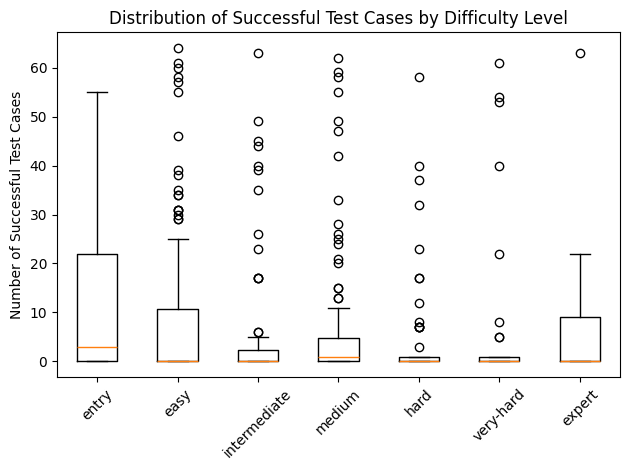

In [16]:
level_successes = {level: {"training": {}} for level in META_ARC_LEVELS.keys()}
uid_successes = {}
for level, v in META_ARC_LEVELS.items():
    for uid in v["training"]:
        result = results[uid]
        num_successes = sum(result["train_test_verdicts"])
        level_successes[level]["training"][uid] = num_successes
        uid_successes[uid] = num_successes

fig, ax = plt.subplots()
difficulty_levels = ['entry', 'easy', 'intermediate', 'medium', 'hard', 'very-hard', 'expert']
plt.boxplot([list(level_successes[level]["training"].values()) for level in difficulty_levels], labels=difficulty_levels)
plt.title('Distribution of Successful Test Cases by Difficulty Level')
plt.ylabel('Number of Successful Test Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
import numpy as np

uid_successes_sorted = sorted(uid_successes.items(), key=lambda x: x[1], reverse=True)
n = 50
sampled_indices = np.arange(len(uid_successes_sorted), step=len(uid_successes_sorted)//n)
sampled_uids = dict([uid_successes_sorted[i] for i in sampled_indices])
sampled_uids


{'08ed6ac7': 64,
 '05f2a901': 58,
 '44f52bb0': 53,
 '4258a5f9': 41,
 '00d62c1b': 35,
 'dc1df850': 31,
 '72ca375d': 26,
 'b527c5c6': 22,
 '4347f46a': 18,
 '5c2c9af4': 17,
 '3e980e27': 12,
 '4c5c2cf0': 8,
 '60b61512': 5,
 '57aa92db': 5,
 'd037b0a7': 3,
 '9f236235': 3,
 '49d1d64f': 2,
 '3bdb4ada': 1,
 '7447852a': 1,
 'd687bc17': 1,
 'b91ae062': 1,
 'b8825c91': 1,
 '6855a6e4': 1,
 '67a3c6ac': 0,
 '67a423a3': 0,
 '95990924': 0,
 '228f6490': 0,
 '2bcee788': 0,
 '694f12f3': 0,
 'b7249182': 0,
 'f76d97a5': 0,
 '890034e9': 0,
 'c8cbb738': 0,
 '6d0aefbc': 0,
 'd90796e8': 0,
 'f1cefba8': 0,
 'f8ff0b80': 0,
 '6d58a25d': 0,
 '681b3aeb': 0,
 '017c7c7b': 0,
 '6fa7a44f': 0,
 'dae9d2b5': 0,
 '1f0c79e5': 0,
 'd9f24cd1': 0,
 '06df4c85': 0,
 '995c5fa3': 0,
 '8eb1be9a': 0,
 'fafffa47': 0,
 '6430c8c4': 0,
 '73251a56': 0}

In [19]:
uid2level = {}
for level, v in META_ARC_LEVELS.items():
    for uid in v["training"]:
        uid2level[uid] = level


In [22]:
from collections import Counter

counter = Counter()
for uid in sampled_uids.keys():
    counter[uid2level[uid]] += 1
    print(uid2level[uid])
counter

easy
easy
very-hard
entry
easy
easy
medium
very-hard
easy
expert
hard
very-hard
entry
very-hard
entry
medium
intermediate
entry
easy
intermediate
medium
hard
expert
easy
easy
easy
easy
easy
easy
easy
easy
intermediate
intermediate
intermediate
intermediate
intermediate
medium
medium
medium
medium
medium
hard
hard
hard
hard
hard
very-hard
very-hard
very-hard
expert


Counter({'easy': 14,
         'medium': 8,
         'very-hard': 7,
         'hard': 7,
         'intermediate': 7,
         'entry': 4,
         'expert': 3})

In [24]:
sampled_uids

{'08ed6ac7': 64,
 '05f2a901': 58,
 '44f52bb0': 53,
 '4258a5f9': 41,
 '00d62c1b': 35,
 'dc1df850': 31,
 '72ca375d': 26,
 'b527c5c6': 22,
 '4347f46a': 18,
 '5c2c9af4': 17,
 '3e980e27': 12,
 '4c5c2cf0': 8,
 '60b61512': 5,
 '57aa92db': 5,
 'd037b0a7': 3,
 '9f236235': 3,
 '49d1d64f': 2,
 '3bdb4ada': 1,
 '7447852a': 1,
 'd687bc17': 1,
 'b91ae062': 1,
 'b8825c91': 1,
 '6855a6e4': 1,
 '67a3c6ac': 0,
 '67a423a3': 0,
 '95990924': 0,
 '228f6490': 0,
 '2bcee788': 0,
 '694f12f3': 0,
 'b7249182': 0,
 'f76d97a5': 0,
 '890034e9': 0,
 'c8cbb738': 0,
 '6d0aefbc': 0,
 'd90796e8': 0,
 'f1cefba8': 0,
 'f8ff0b80': 0,
 '6d58a25d': 0,
 '681b3aeb': 0,
 '017c7c7b': 0,
 '6fa7a44f': 0,
 'dae9d2b5': 0,
 '1f0c79e5': 0,
 'd9f24cd1': 0,
 '06df4c85': 0,
 '995c5fa3': 0,
 '8eb1be9a': 0,
 'fafffa47': 0,
 '6430c8c4': 0,
 '73251a56': 0}

In [26]:
import json

sampled_data = []
with open("../finetune/inference/problems/arc_problems_train_400_extra_newline_v2.jsonl") as f:
    for line in f:
        data = json.loads(line)
        if data["uid"] in sampled_uids.keys():
            messages = data.pop("messages")
            data["level"] = uid2level[data["uid"]]
            data["prev_success_rate"] = sampled_uids[data["uid"]] / 64.
            data["messages"] = messages
            sampled_data.append(data)

with open("../finetune/inference/problems/arc_problems_train_400_extra_newline_v2_sampled50.jsonl", "w") as f:
    for data in sampled_data:
        json.dump(data, f)
        f.write("\n")

In [1]:
from datasets import load_dataset

dataset = load_dataset("suehyunpark/induction_arc_inputs_train_bc_trajectories_max10-per-task_warm-start", split="train_sft")
dataset[4]

/home/suehyun/.conda/envs/barc/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'uid': '44d8ac46_4',
 'messages': [{'content': 'You are a world-class puzzle solver with exceptional pattern recognition skills and expertise in Python programming. Your task is to analyze puzzles and provide Python solutions.',
   'role': 'system'},
  {'content': 'Given input-output grid pairs as reference examples, carefully observe the patterns to predict the output grid for new test input. Each pair follows the same transformation rule. Grids are 2D arrays represented as strings, with cells (colors) separated by spaces and rows by newlines.\nHere are the input and output grids for the reference examples:\nExample 1\nInput:\nBlack Black Black Black Black Black Black Black Black Black Black Black\nBlack Black Black Black Black Black Black Black Black Black Black Black\nBlack Gray Gray Gray Gray Black Black Black Black Black Black Black\nBlack Gray Black Black Gray Black Black Black Black Black Black Black\nBlack Gray Black Black Gray Black Black Gray Gray Gray Gray Black\nBlack Gray

In [29]:
instance = dataset[4]
for message in instance["messages"]:
    print('#'*2 + message["role"].upper())
    print(message["content"])
    print()


##SYSTEM
You are a world-class puzzle solver with exceptional pattern recognition skills and expertise in Python programming. Your task is to analyze puzzles and provide Python solutions.

##USER
Given input-output grid pairs as reference examples, carefully observe the patterns to predict the output grid for new test input. Each pair follows the same transformation rule. Grids are 2D arrays represented as strings, with cells (colors) separated by spaces and rows by newlines.
Here are the input and output grids for the reference examples:
Example 1
Input:
Black Black Black Black Black Black Black Black Black Black Black Black
Black Black Black Black Black Black Black Black Black Black Black Black
Black Gray Gray Gray Gray Black Black Black Black Black Black Black
Black Gray Black Black Gray Black Black Black Black Black Black Black
Black Gray Black Black Gray Black Black Gray Gray Gray Gray Black
Black Gray Gray Gray Gray Black Black Gray Black Gray Gray Black
Black Black Black Black B

In [30]:
instance["uid"]

'44d8ac46_4'

In [2]:
instance = dataset[10]
print(instance["uid"])
for message in instance["messages"]:
    print('#'*2 + message["role"].upper())
    print(message["content"])
    print()

9172f3a0_7
##SYSTEM
You are a world-class puzzle solver with exceptional pattern recognition skills and expertise in Python programming. Your task is to analyze puzzles and provide Python solutions.

##USER
Given input-output grid pairs as reference examples, carefully observe the patterns to predict the output grid for new test input. Each pair follows the same transformation rule. Grids are 2D arrays represented as strings, with cells (colors) separated by spaces and rows by newlines.
Here are the input and output grids for the reference examples:
Example 1
Input:
Green Green Black
Orange Yellow Black
Black Black Yellow

Output:
Green Green Green Green Green Green Black Black Black
Green Green Green Green Green Green Black Black Black
Green Green Green Green Green Green Black Black Black
Orange Orange Orange Yellow Yellow Yellow Black Black Black
Orange Orange Orange Yellow Yellow Yellow Black Black Black
Orange Orange Orange Yellow Yellow Yellow Black Black Black
Black Black Black B